In [71]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Load the dataset
data = pd.read_csv('Task01_Dataset.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [74]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [75]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [76]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

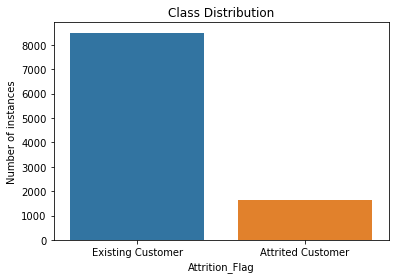

In [80]:
# Count the number of instances for each class
out_col = 'Attrition_Flag'

# Plot a bar chart to visualize the class imbalance
sns.countplot(x = out_col, data = data)
plt.title('Class Distribution')
plt.xlabel('Attrition_Flag')
plt.ylabel('Number of instances')
plt.show()

In [56]:
output_mapping_int = {'Existing Customer':0, 'Attrited Customer':1}
data['Attrition_Flag'] = data['Attrition_Flag'].replace(output_mapping_int)

In [57]:
# Handle missing values
# Not needed here but you should keep it in you pipeline just to be sure
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [58]:

# Convert categorical variables to numerical variables
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])


In [59]:
# Split the data into features and target
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']


In [60]:
X.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,7152,19,1,3,3,1,2,0,26,4,1,3,4623,324,4935,987,217,32,791,58
1,9812,23,0,5,2,2,4,0,31,5,1,2,3623,408,3949,1073,338,23,829,102
2,3053,25,1,3,2,1,3,0,23,3,1,0,1623,0,2485,1154,893,10,818,0
3,7204,14,0,4,3,3,4,0,21,2,4,1,1552,1973,686,1020,236,10,818,757
4,501,14,1,3,5,1,2,0,8,4,1,0,2363,0,3089,1145,65,18,821,0


In [69]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [61]:
# Scale the data to improve model performance
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)


In [62]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Selection

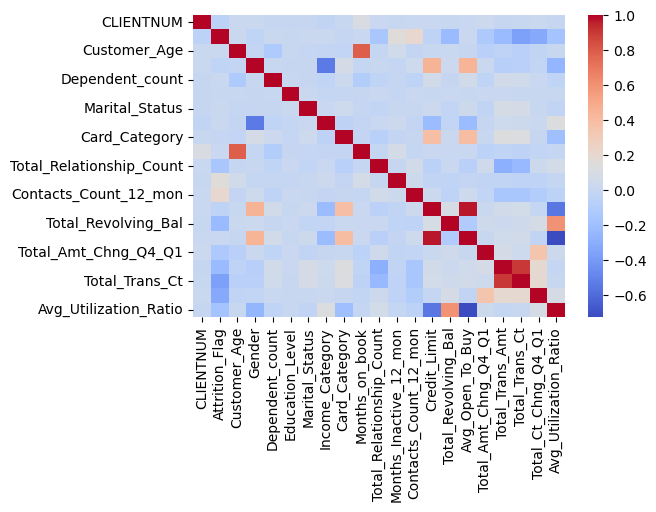

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Use correlation matrix to identify the most relevant features
correlation_matrix = data.corr()

plt.figure(dpi = 100)
sns.heatmap(correlation_matrix, cmap = "coolwarm")
plt.show()


In [64]:
top_k_features = correlation_matrix.nlargest(n=15, columns='Attrition_Flag')['Attrition_Flag'].index
top_k_features

Index(['Attrition_Flag', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon',
       'Dependent_count', 'Marital_Status', 'Customer_Age', 'Income_Category',
       'Months_on_book', 'Avg_Open_To_Buy', 'Education_Level', 'Card_Category',
       'Gender', 'Credit_Limit', 'CLIENTNUM', 'Total_Amt_Chng_Q4_Q1'],
      dtype='object')

In [65]:
# Select the top K features using feature importance techniques
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

## Algorithm Selection

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Choose a set of classification algorithms to evaluate
algorithms = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]


In [67]:
# Train each algorithm on the training set with the selected features
for name, algorithm in algorithms:
    algorithm.fit(X_train, y_train)

## Model Evaluation

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the performance of each model using different metrics
for name, algorithm in algorithms:
    y_pred = algorithm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(classification_report(y_test, y_pred))
    print('For the prefered label:')
    print(f'{name}:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-score: {f1}\n\n')


              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1699
           1       0.71      0.48      0.57       327

    accuracy                           0.88      2026
   macro avg       0.81      0.72      0.75      2026
weighted avg       0.87      0.88      0.87      2026

For the prefered label:
Logistic Regression:
Accuracy: 0.8845014807502468
Precision: 0.7123287671232876
Recall: 0.47706422018348627
F1-score: 0.5714285714285714


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1699
           1       0.72      0.70      0.71       327

    accuracy                           0.91      2026
   macro avg       0.83      0.82      0.83      2026
weighted avg       0.91      0.91      0.91      2026

For the prefered label:
Decision Tree:
Accuracy: 0.9076999012833169
Precision: 0.7215189873417721
Recall: 0.6972477064220184
F1-score: 0.7091757387247278


              precision    